In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [12]:
n_pts = 500
X, y = datasets.make_circles(
    n_samples = n_pts, 
    random_state=123, 
    noise=0.1, 
    factor=0.2
)

print(X,y)

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

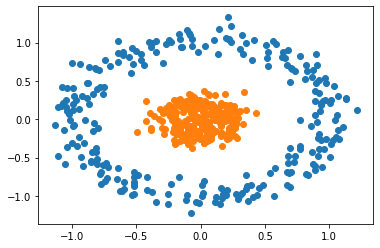

In [13]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [17]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(lr = 0.01)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: 0.7203 - accuracy: 0.4860
Epoch 2/100
500/500 [==============================] - 0s 143us/step - loss: 0.6943 - accuracy: 0.5160
Epoch 3/100
500/500 [==============================] - 0s 138us/step - loss: 0.6940 - accuracy: 0.4900
Epoch 4/100
500/500 [==============================] - 0s 225us/step - loss: 0.6915 - accuracy: 0.5000
Epoch 5/100
500/500 [==============================] - 0s 169us/step - loss: 0.6917 - accuracy: 0.6820
Epoch 6/100
500/500 [==============================] - 0s 125us/step - loss: 0.6921 - accuracy: 0.4560
Epoch 7/100
500/500 [==============================] - 0s 131us/step - loss: 0.6901 - accuracy: 0.6400
Epoch 8/100
500/500 [==============================] - 0s 206us/step - loss: 0.6885 - accuracy: 0.6580
Epoch 9/100
500/500 [==============================] - 0s 158us/step - loss: 0.6872 - accuracy: 0.6820
Epoch 10/100
500/500 [==============================] - 0s 143us/step - los

500/500 [==============================] - 0s 103us/step - loss: 0.0403 - accuracy: 1.0000
Epoch 80/100
500/500 [==============================] - 0s 143us/step - loss: 0.0392 - accuracy: 1.0000
Epoch 81/100
500/500 [==============================] - 0s 108us/step - loss: 0.0382 - accuracy: 1.0000
Epoch 82/100
500/500 [==============================] - 0s 90us/step - loss: 0.0372 - accuracy: 1.0000
Epoch 83/100
500/500 [==============================] - 0s 83us/step - loss: 0.0362 - accuracy: 1.0000
Epoch 84/100
500/500 [==============================] - 0s 124us/step - loss: 0.0353 - accuracy: 1.0000
Epoch 85/100
500/500 [==============================] - 0s 102us/step - loss: 0.0344 - accuracy: 1.0000
Epoch 86/100
500/500 [==============================] - 0s 121us/step - loss: 0.0335 - accuracy: 1.0000
Epoch 87/100
500/500 [==============================] - 0s 104us/step - loss: 0.0327 - accuracy: 1.0000
Epoch 88/100
500/500 [==============================] - 0s 96us/step - loss: 0.

Text(0.5, 1.0, 'accuracy')

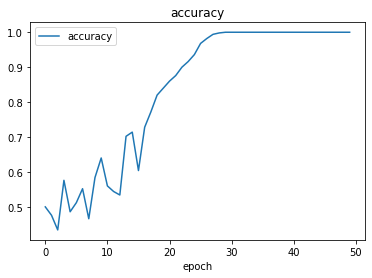

In [15]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

In [16]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,0]) + 0.25)
    
#     print(y_span
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
#     print(xx)
#     print(yy)
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

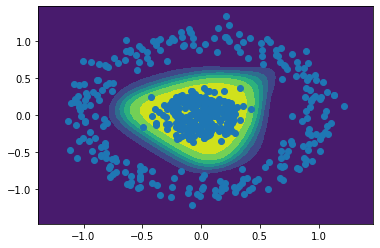

In [18]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is:  [[0.98726034]]


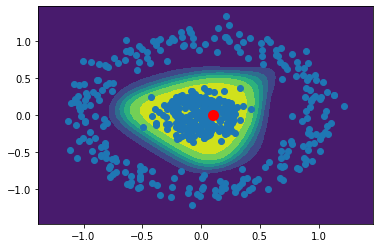

In [20]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)